# Retention Project Modeling Workbook

## Questions beyond the data

- Does data account for major changes? 
- Which students were fall to fall and spring to spring?
- How to account for students who skip a semester?
- How to make each student a single row and seperate students into subsamples?

In [1]:
# Import for Data Manipulation
import pandas as pd
import numpy as np 

# Import for Data Visualization
import seaborn as sns
from matplotlib import pyplot as plt
import squarify

# Import for data acquisition and prep
import wrangle

# Import for Scaling and Spliting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Import for hypothesis testing
from scipy import stats

# Import for Classification models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Import for analysis of classification models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Import for Clustering
from sklearn.cluster import KMeans

# Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set to see all rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [2]:
# Test Functions
students, sparse_dummies = wrangle.prep_student_data(wrangle.acquire_student_data())
# students.head()

In [3]:
# Split Data for further exploration
target = 'retained'
train, validate, test = wrangle.split_data(students, target)
# train.head()

In [4]:
# Scale data
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train,validate,test)
train_scaled.head()

,reg_before_start,term_gpa
434221,0.898204,0.305556
357083,0.239521,0.750000
418485,0.497006,0.500000
178811,0.407186,1.000000
100114,0.497006,0.639167


# TODO

## Feature Engineering

- term_gpa only missing a few, spike near 0.0, spike near 4.0, 2.0 and higher seems to be a much larger group than 2.0 and below. (possible clusters?)

- reg_before_start spike between 75 and 100, below 75 higher than above 100, external research shows an average of 85 days for reg to spring semester and 140 for reg to fall (Possible Feature, cluster or both)

- column for major change status? Does this affect other columns stats?

- How to account for students who skip a semester (Counted as not retained but returned the following semester)?

## Clustering

- term gpa clusters?

- reg_before_start cluster?

- efc cluster?

- catagorical clustering?

- Spherical Kmeans

- Distance measures? (Jaccard)

## Dimensionality reduction

- How do you compare smaller populations importance of retention to the overall population?

- Rank values by their Retention percentage (feature? or dimensionality reduction? (regularization?))

## Model

- Relationship between models and scale types. What needs what data

- model distance types

# Feature Exploration

## Feature Engineering

### Feature Engineering Summary:

## Clustering

### K-modes

In [5]:
# from kmodes.kmodes import KModes

# # reproduce results on small soybean data set
# x = np.genfromtxt('soybean.csv', dtype=int, delimiter=',')[:, :-1]
# y = np.genfromtxt('soybean.csv', dtype=str, delimiter=',', usecols=(35, ))

# kmodes_huang = KModes(n_clusters=4, init='Huang', verbose=1)
# kmodes_huang.fit(x)

# # Print cluster centroids of the trained model.
# print('k-modes (Huang) centroids:')
# print(kmodes_huang.cluster_centroids_)
# # Print training statistics
# print(f'Final training cost: {kmodes_huang.cost_}')
# print(f'Training iterations: {kmodes_huang.n_iter_}')

# kmodes_cao = KModes(n_clusters=4, init='Cao', verbose=1)
# kmodes_cao.fit(x)

# # Print cluster centroids of the trained model.
# print('k-modes (Cao) centroids:')
# print(kmodes_cao.cluster_centroids_)
# # Print training statistics
# print(f'Final training cost: {kmodes_cao.cost_}')
# print(f'Training iterations: {kmodes_cao.n_iter_}')

# print('Results tables:')
# for result in (kmodes_huang, kmodes_cao):
#     classtable = np.zeros((4, 4), dtype=int)
#     for ii, _ in enumerate(y):
#         classtable[int(y[ii][-1]) - 1, result.labels_[ii]] += 1

#     print("\n")
#     print("    | Cl. 1 | Cl. 2 | Cl. 3 | Cl. 4 |")
#     print("----|-------|-------|-------|-------|")
#     for ii in range(4):
#         prargs = tuple([ii + 1] + list(classtable[ii, :]))
#         print(" D{0} |    {1:>2} |    {2:>2} |    {3:>2} |    {4:>2} |".format(*prargs))


#### K-Modes Summary:

### K-prototypes

In [6]:
# from kmodes.kprototypes import KPrototypes

# # stocks with their market caps, sectors and countries
# syms = np.genfromtxt('stocks.csv', dtype=str, delimiter=',')[:, 0]
# X = np.genfromtxt('stocks.csv', dtype=object, delimiter=',')[:, 1:]
# X[:, 0] = X[:, 0].astype(float)

# kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2)
# clusters = kproto.fit_predict(X, categorical=[1, 2])

# # Print cluster centroids of the trained model.
# print(kproto.cluster_centroids_)
# # Print training statistics
# print(kproto.cost_)
# print(kproto.n_iter_)

# for s, c in zip(syms, clusters):
#     print(f"Symbol: {s}, cluster:{c}")

#### K-prototypes Summary: 

### CART

#### CART Summary:

### Hierarchical Clustering

#### Hierarchical Clustering Summary:

### SVM or tree reduction

#### SVM or tree reduction Summary:

### Clustering Summary:

## Dimensionality Reduction

In [7]:
#train[train.columns[train.dtypes != 'object']].head()

### Statistical Reduction

In [8]:
variables = students.columns[students.dtypes == 'object']

for col in variables:
    print(f'{col}\n\n\n{students[col].value_counts(dropna=False)}\n\n')

race_ethn


White                               263676
Hispanic                             96997
African American                     28147
Two or more races                    18238
Asian                                17760
Missing/Unknown                      16043
American Indian/Alaskan Native        2903
Two or More Races                     2151
International                         1405
Native Hawaiian/Pacific Islander       766
Name: race_ethn, dtype: int64


fgen


1GY    232156
1GN    184874
1GX     31056
Name: fgen, dtype: int64


student_year


FR    122967
JU    115323
SE    105466
SO    104330
Name: student_year, dtype: int64


enroll_type


TRANSFER    232940
FIRST       212915
CONC          2231
Name: enroll_type, dtype: int64


cip


52    84283
24    53784
50    29942
42    28328
26    27477
43    22258
13    19317
23    17899
15    17834
30    16912
51    16506
44    14714
31    14529
45    13595
11    11601
49    11208
54     9687
9      9549
40     8268
3      78

#### Statistical Reduction Summary:

### SelectKBest

In [9]:
# # Import selectkbest from sklearn
# from sklearn.feature_selection import SelectKBest, chi2

# df = train[train.columns[train.dtypes != 'object']].head()

# X_df = df.drop(columns ='retained')
# y_df = df.retained

# # select K best features
# X_best = SelectKBest(chi2, k='all').fit(X_df,y_df)

# X_df_X_best = X_best.transform(X_df)
 
# feature_mask = X_best.get_support()

# f_feature = X_df.iloc[:,feature_mask].columns.tolist()

# f_feature

In [10]:
# X_df.columns

In [11]:
# train[['depend_status','yrs_since_start']].value_counts(normalize=True)
# train.shape

In [12]:
# train.groupby(['depend_status','yrs_since_start']).retained.mean()

In [13]:
# train.act.value_counts(normalize=True)

In [14]:
# train.groupby(['depend_status','yrs_since_start','act']).retained.mean().sort_values()

#### SelectKBest Summary: Need to fix later. SelectKBest is just returning the last columns in the column list with no data. Running low on time come back round 2.

### Recursive Feature Elimination

In [15]:
# # Import RFE from Sklearn
# from sklearn.feature_selection import RFE

# # initialize Linear Regression model
# lm = LinearRegression()

# # Create Recursive Feature Elimination model
# rfe = RFE(lm, n_features_to_select=3)

# # fit the model
# rfe.fit(X_train_scaled, y_train)

# # get mask of columns selected
# feature_mask = rfe.support_

# # get list of selected column names
# rfe_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()

# # Create list of variables and their ranking

# # ranks
# var_ranks = rfe.ranking_

# # names
# var_names = X_train_scaled.columns.tolist()

# # combine to dataframe
# rfe_ranks_df = pd.DataFrame({'Variable' : var_names, 'Rank' : var_ranks})

# # sort
# rfe_ranks_df.sort_values('Rank')

#### RFE Summary:

### Dimensionality Reduction and Feature Exploration Summary:

# Modeling

## Baseline:

In [41]:
model_train = train[train.columns[(train.dtypes != 'object') & (train.columns != 'id')]]
model_validate = validate[validate.columns[(validate.dtypes != 'object') & (validate.columns != 'id')]]
model_test = train[test.columns[(test.dtypes != 'object') & (test.columns != 'id')]]

In [42]:
# model_train.head()

In [43]:
# Setting a baseline of Retained or 1

# We use the DummyClassifier from sklearn to create a baseline accuracy.
from sklearn.dummy import DummyClassifier 

# Here we create and fit the model
dummy = DummyClassifier(strategy='most_frequent', random_state = 1729, constant = None)
dummy.fit(model_train[model_train.columns[model_train.columns != 'retained']], model_train.retained)   

# Here we create our predictions
y_pred = dummy.predict(model_train[model_train.columns[model_train.columns != 'retained']])

# Check report for current baseline accuracy: 0.73
print(classification_report(model_train.retained, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     80251
           1       0.68      1.00      0.81    170676

    accuracy                           0.68    250927
   macro avg       0.34      0.50      0.40    250927
weighted avg       0.46      0.68      0.55    250927



### Baseline Summary: Our baseline value will be retained as it is the mode of retention predictions.

## Evaluation Metrics

The metric I will use for evaluation is 


## Train Initial Models:

### Decision Tree

In [44]:
# train[train.columns[train.dtypes != 'object']].head()

In [45]:
# Import the sklearn Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Split the data
x_train_dt, y_train_dt = wrangle.model_split(model_train, 'retained')

# Create the model
dtc = DecisionTreeClassifier(max_depth=4, random_state=1729)

# Fit the model to training set
dtc = dtc.fit(x_train_dt, y_train_dt)

# Predict on trianing set
y_pred_dt = dtc.predict(x_train_dt)

# Print the report
print(classification_report(y_train_dt, y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63     80251
           1       0.81      0.94      0.87    170676

    accuracy                           0.81    250927
   macro avg       0.81      0.73      0.75    250927
weighted avg       0.81      0.81      0.79    250927



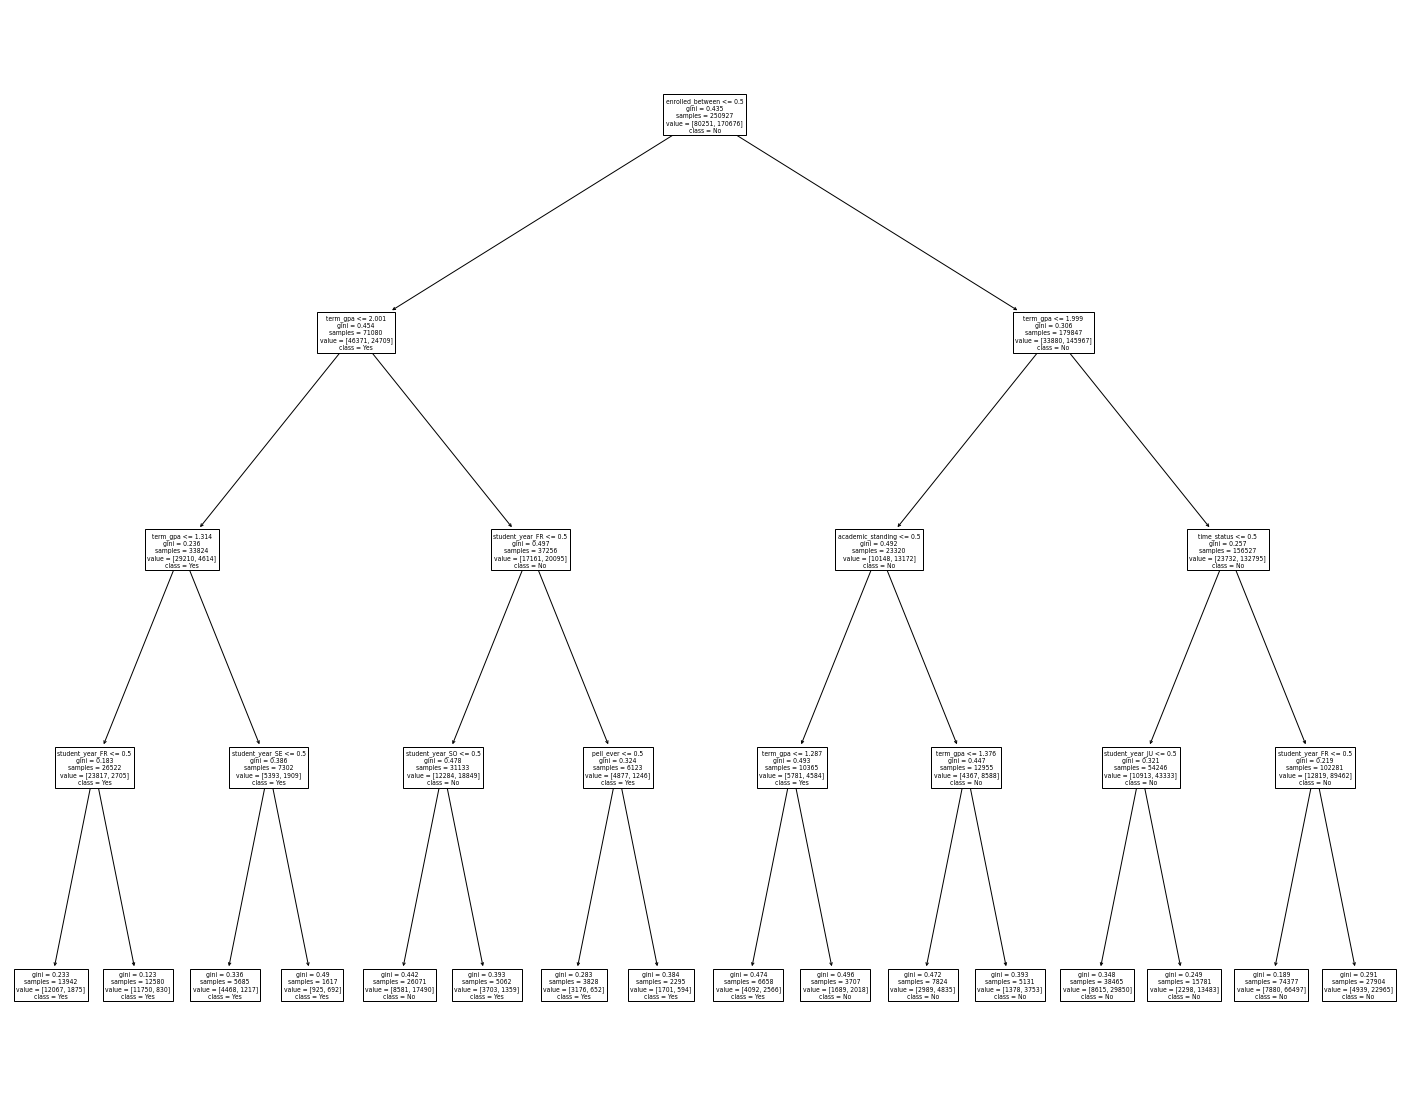

In [46]:
plt.figure(figsize=(25,20))
plot_tree(dtc, feature_names = x_train_dt.columns, class_names=['Yes','No'])
plt.show()

#### Decision Tree Summary: 

### Random Forest

In [47]:
x_train_rf, y_train_rf = wrangle.model_split(model_train, 'retained')
rf = RandomForestClassifier(min_samples_leaf=3,
                            max_depth=3, 
                            random_state=1729)
rf.fit(x_train_rf, y_train_rf)
y_pred_rf = rf.predict(x_train_rf)

print(classification_report(y_train_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.28      0.42     80251
           1       0.74      0.98      0.85    170676

    accuracy                           0.76    250927
   macro avg       0.81      0.63      0.63    250927
weighted avg       0.79      0.76      0.71    250927



#### Random Forst Summary:

### KNN

In [48]:
# # Import the sklearn knn classifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler

# # split the data
# x_train, y_train, = wrangle.model_split(model_train, 'retained')
# x_validate, y_validate, = wrangle.model_split(model_validate, 'retained')
# x_test, y_test, = wrangle.model_split(model_test, 'retained')

# stan_scal = StandardScaler()
# x_train = stan_scal.fit_transform(x_train)
# x_validate = stan_scal.transform(x_validate)
# x_test = stan_scal.transform(x_test)

# error_rate = []
# for i in range(1,20):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(x_train,y_train)
#     pred_i = knn.predict(x_test)
#     error_rate.append(np.mean(pred_i != y_test.T))

# plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')
# req_k_value = error_rate.index(min(error_rate))+1
# print("Minimum error:-",min(error_rate),"at K =",req_k_value)


In [49]:
# pred_i.dtype

In [50]:
# # Create the model
# knn = KNeighborsClassifier(n_neighbors=, metric='jaccard')

# # Fit the model to training set
# knn.fit(x_train_knn, y_train_knn)

# # Predict on training set
# y_pred_knn = knn.predict(x_train_knn)

# # Print the report
# print(classification_report(y_train_knn, y_pred_knn))

#### KNN Summary:

### Logistic Regression

In [51]:
# Import sklearn logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# Split the data
x_train_lr, y_train_lr = wrangle.model_split(model_train, 'retained')

# Create the model
logit = LogisticRegression(C=10, random_state=1729)

# Fit the model to training set
logit.fit(x_train_lr, y_train_lr)

# Predict on training set
y_pred_lr = logit.predict(x_train_lr)

# Print the report
print(classification_report(y_train_lr, y_pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.56      0.65     80251
           1       0.82      0.92      0.87    170676

    accuracy                           0.81    250927
   macro avg       0.79      0.74      0.76    250927
weighted avg       0.80      0.81      0.80    250927



#### Logistic Regression Summary:

### SVM

#### SVM Summary:

### Ensemble

#### Ensemble Summary:

### Train Initial Models Summary:

## Validate Top Models

In [52]:
# Validate Decision Tree
x_validate_dt, y_validate_dt = wrangle.model_split(model_validate, 'retained')
y_pred_val_dt = dtc.predict(x_validate_dt)

print(classification_report(y_validate_dt, y_pred_val_dt))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63     34394
           1       0.81      0.94      0.87     73147

    accuracy                           0.81    107541
   macro avg       0.81      0.73      0.75    107541
weighted avg       0.81      0.81      0.79    107541



In [53]:
# Validate Random Forest 
x_validate_rf, y_validate_rf = wrangle.model_split(model_validate, 'retained')
y_pred_val_rf = rf.predict(x_validate_rf)

print(classification_report(y_validate_rf, y_pred_val_rf))

              precision    recall  f1-score   support

           0       0.88      0.28      0.42     34394
           1       0.74      0.98      0.85     73147

    accuracy                           0.76    107541
   macro avg       0.81      0.63      0.63    107541
weighted avg       0.79      0.76      0.71    107541



In [54]:
# # Validate KNN
# x_validate_knn, y_validate_knn = wrangle.model_split(model_validate, 'retained')
# y_pred_val_knn = knn.predict(x_validate_knn)

# print(classification_report(y_validate_knn, y_pred_val_knn))

In [55]:
# # Validate Logistic Regression
x_validate_lr, y_validate_lr = wrangle.model_split(model_validate, 'retained')
y_pred_val_lr = logit.predict(x_validate_lr)

print(classification_report(y_validate_lr, y_pred_val_lr))

              precision    recall  f1-score   support

           0       0.77      0.56      0.65     34394
           1       0.82      0.92      0.87     73147

    accuracy                           0.81    107541
   macro avg       0.79      0.74      0.76    107541
weighted avg       0.80      0.81      0.80    107541



### Validate Summary:

## Test Final Model

In [56]:
# Test on Decision Tree
x_test_dt, y_test_dt, = wrangle.model_split(model_validate, 'retained')
y_pred_test_dt = dtc.predict(x_test_dt)

print(classification_report(y_test_dt, y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63     34394
           1       0.81      0.94      0.87     73147

    accuracy                           0.81    107541
   macro avg       0.81      0.73      0.75    107541
weighted avg       0.81      0.81      0.79    107541



### Test Final Model Summary:

## Modeling Summary:

# Conclusion: